# Imports and Setup

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# os.getcwd()
os.chdir('/home/david/Desktop/projects/thesis/')

from downstream_classification.utils.registration import register_all_peaks_to_minimal_peak, extract_start

individual_signals_path = './downstream_classification/data/individual-signals/'
individual_registered_signals_path = './downstream_classification/data/individual-signals-registered/'
# os.makedirs(individual_registered_signals_path)

individual_signals = os.listdir(individual_signals_path)
print('Num Signals:', len(individual_signals))
print('First 10 files')
print(individual_signals[:10])

signals = [x.split('.')[0] for x in individual_signals]
print('First 10 signals')
print(signals[:10])


Num Signals: 408733
First 10 files
['120994.npy', '142376.npy', '523733.npy', '223886.npy', '466227.npy', '229782.npy', '303487.npy', '253256.npy', '24689.npy', '483926.npy']
First 10 signals
['120994', '142376', '523733', '223886', '466227', '229782', '303487', '253256', '24689', '483926']


In [2]:
def plot_12_channels_vertically(signal, title=None):
    num_signals = 12
    fig, axes = plt.subplots(num_signals, 1, figsize=(10, 20))  # Adjust figure size as needed

    for i in range(num_signals):
        axes[i].plot(signal[i])
        
        # our method
        sig = signal[i]
        try:
            axes[i].vlines(x=extract_start(sig),ymin=0,ymax=1, color='r')
        except:
            pass


        axes[i].set_xlabel("Time")
        axes[i].set_ylabel("Amplitude")
        axes[i].grid(True)


    plt.tight_layout()
    if title:
        plt.suptitle(title)
    plt.show()



# Examples

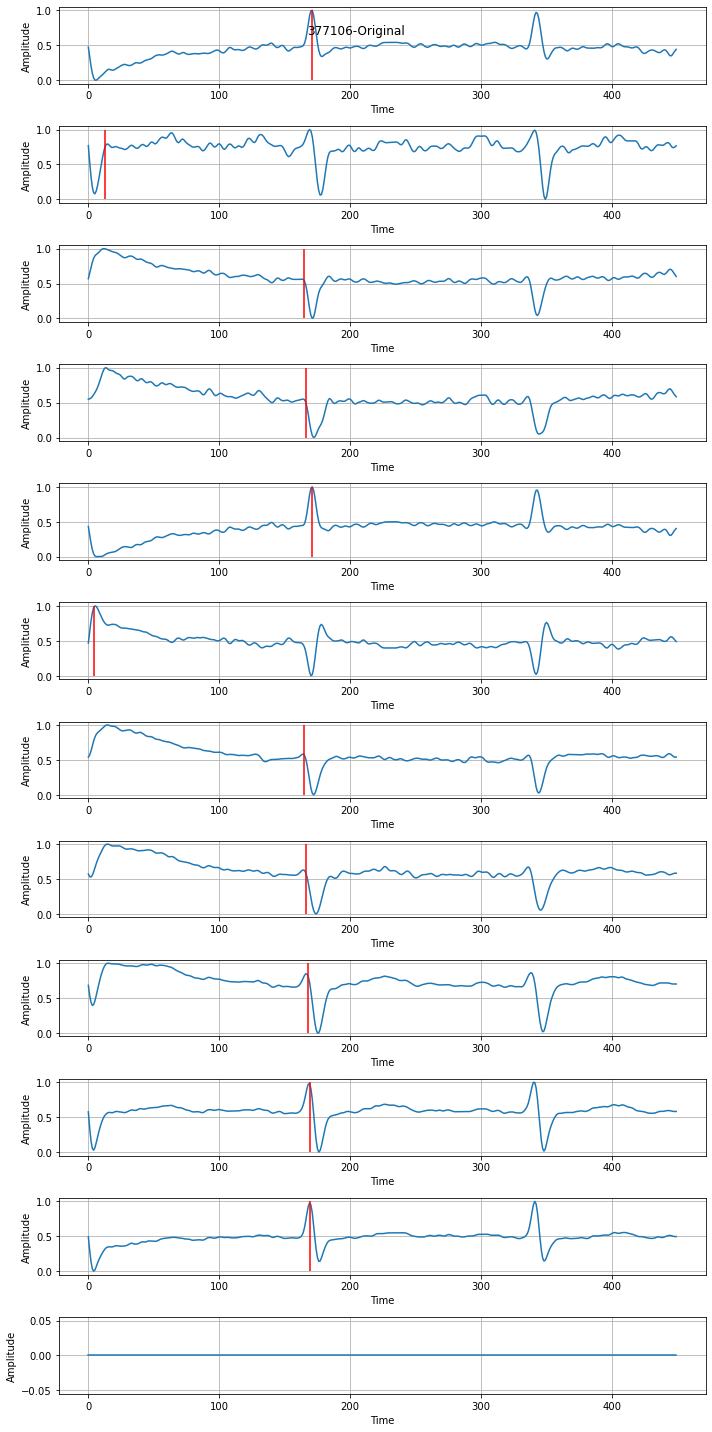

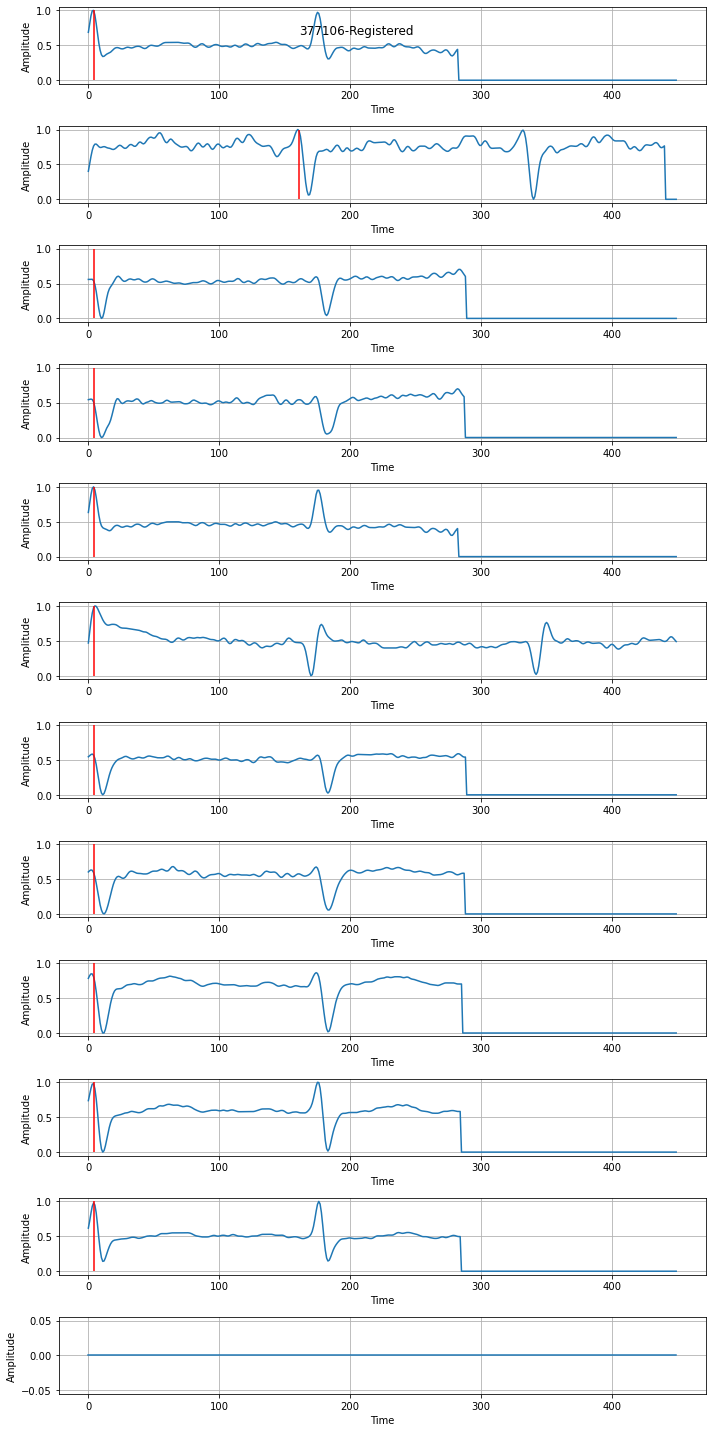

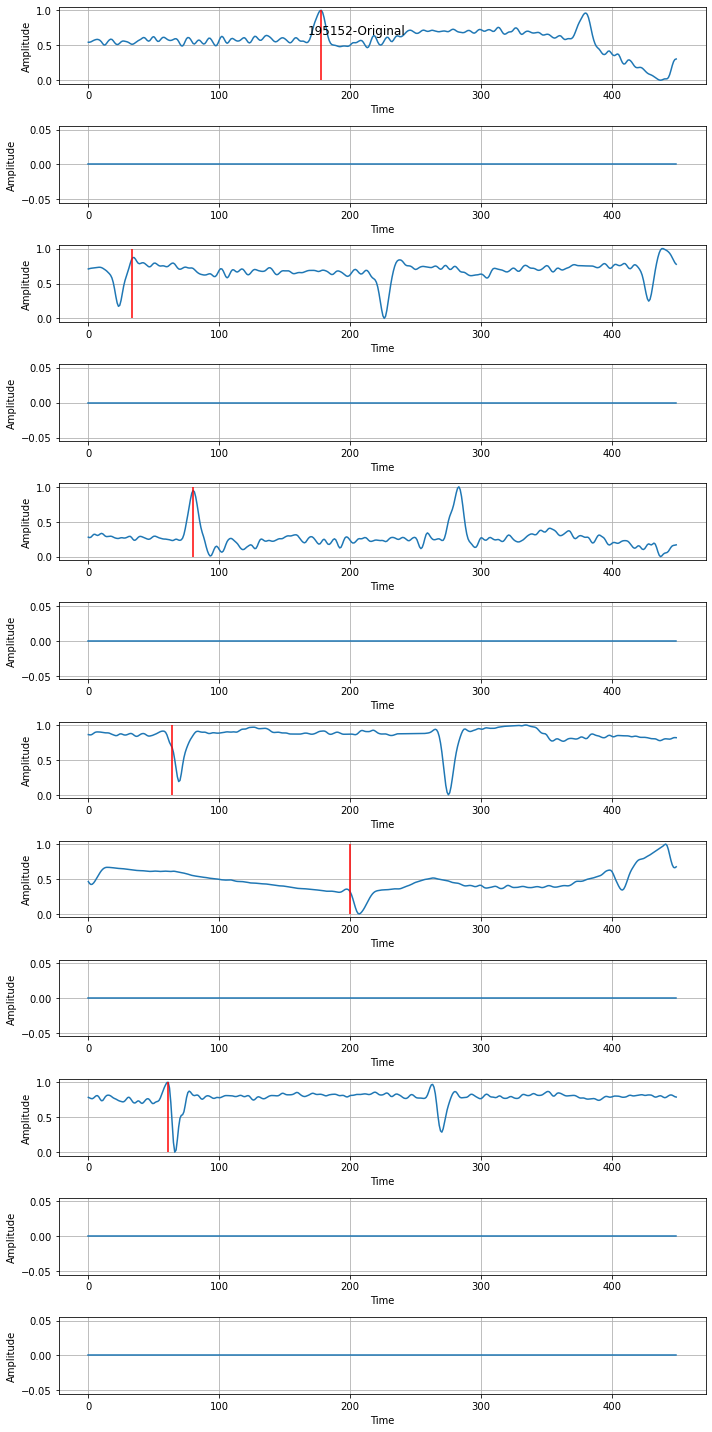

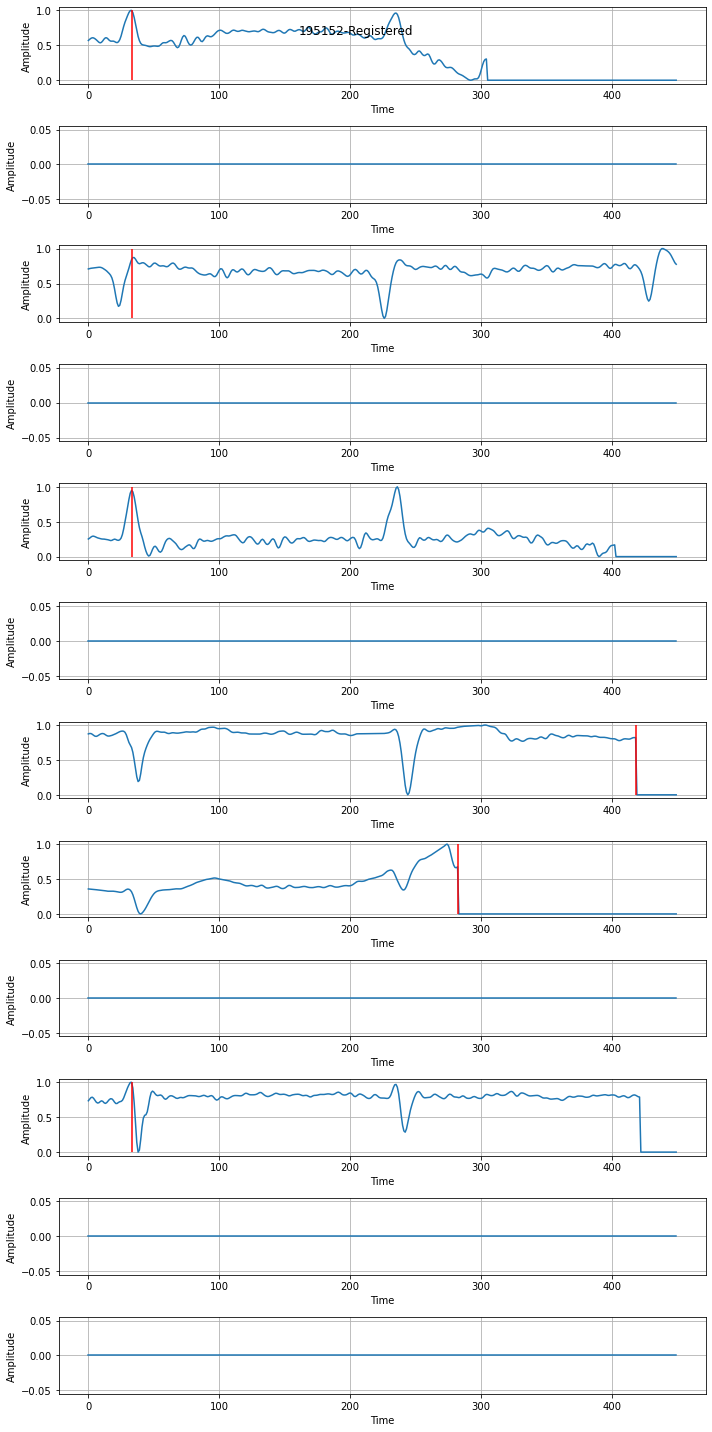

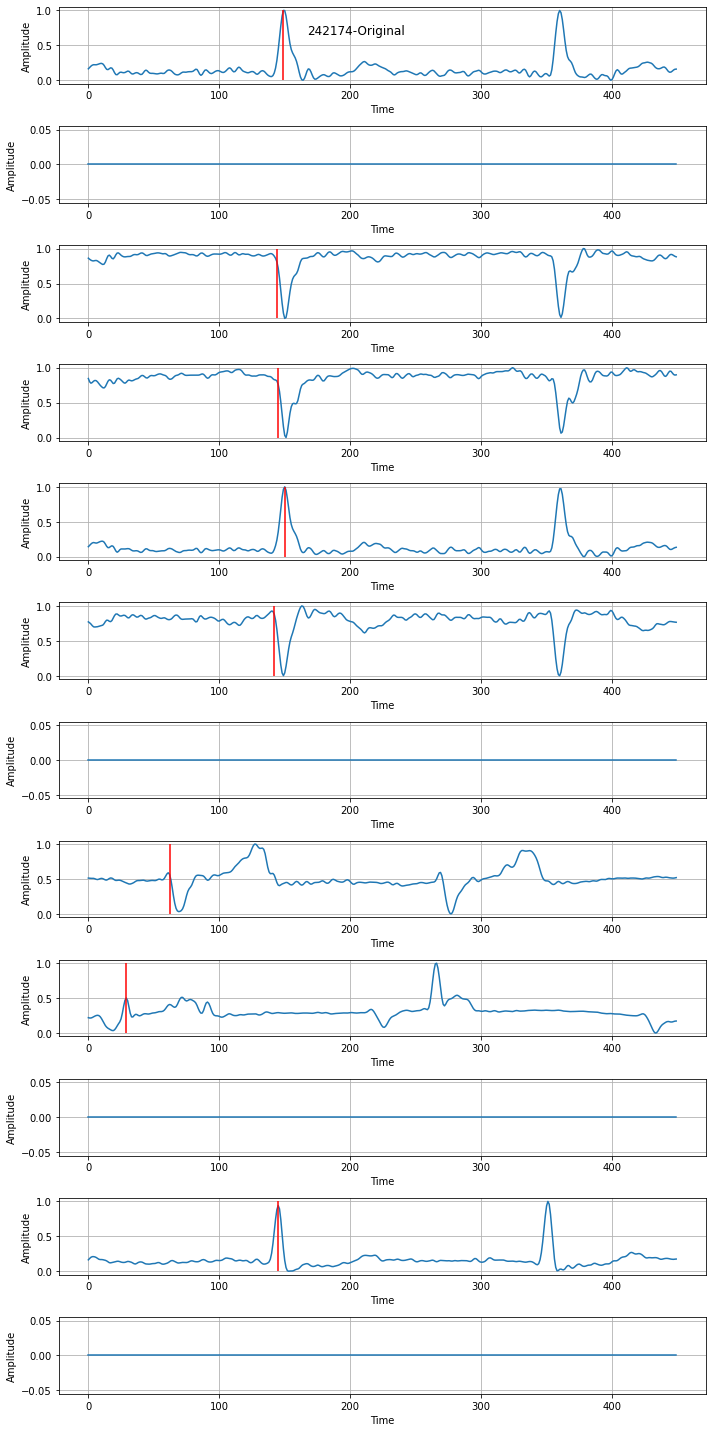

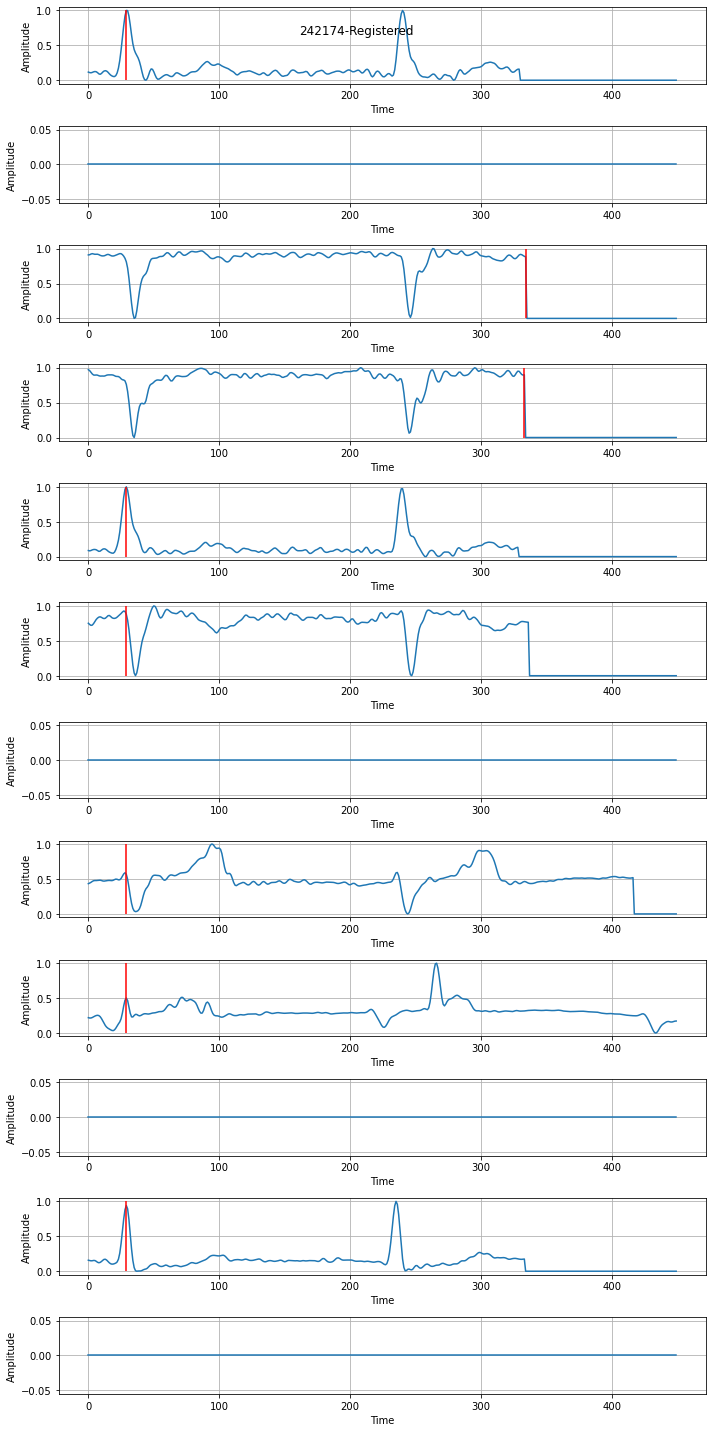

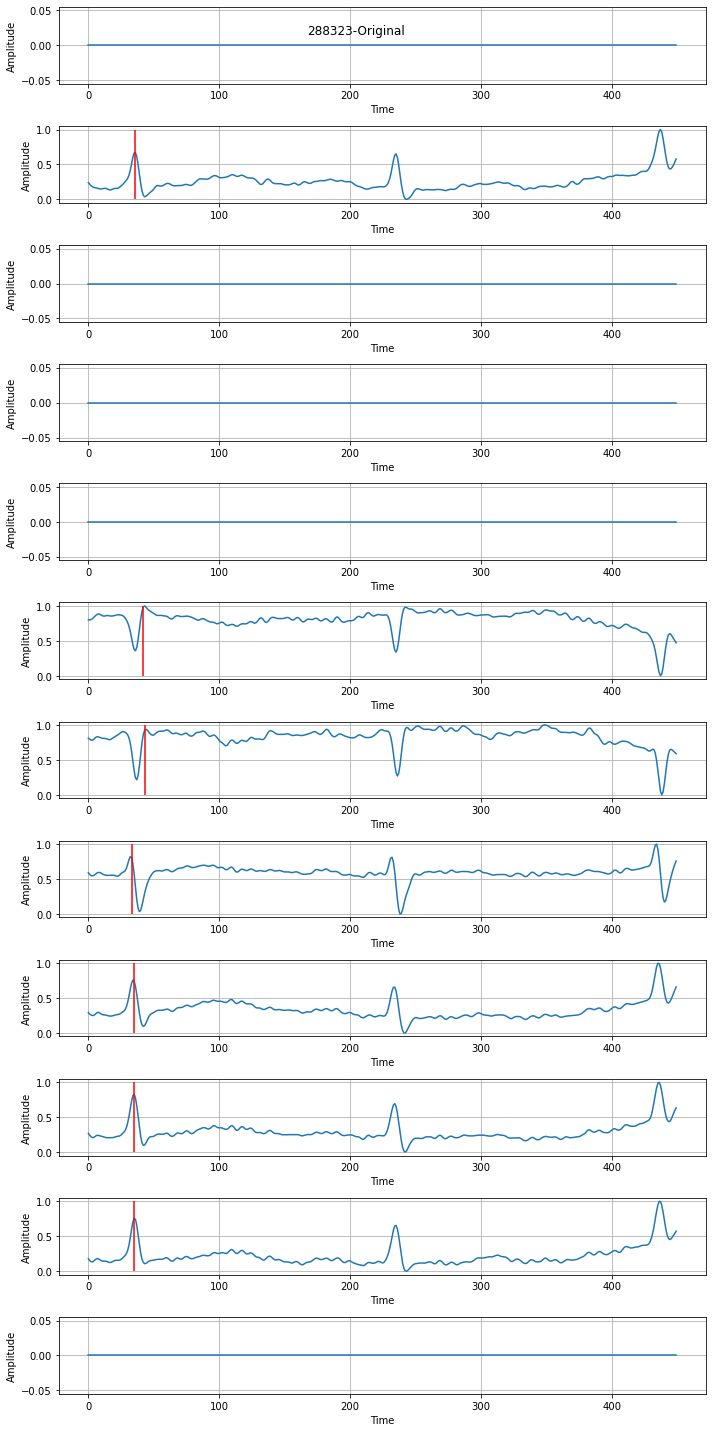

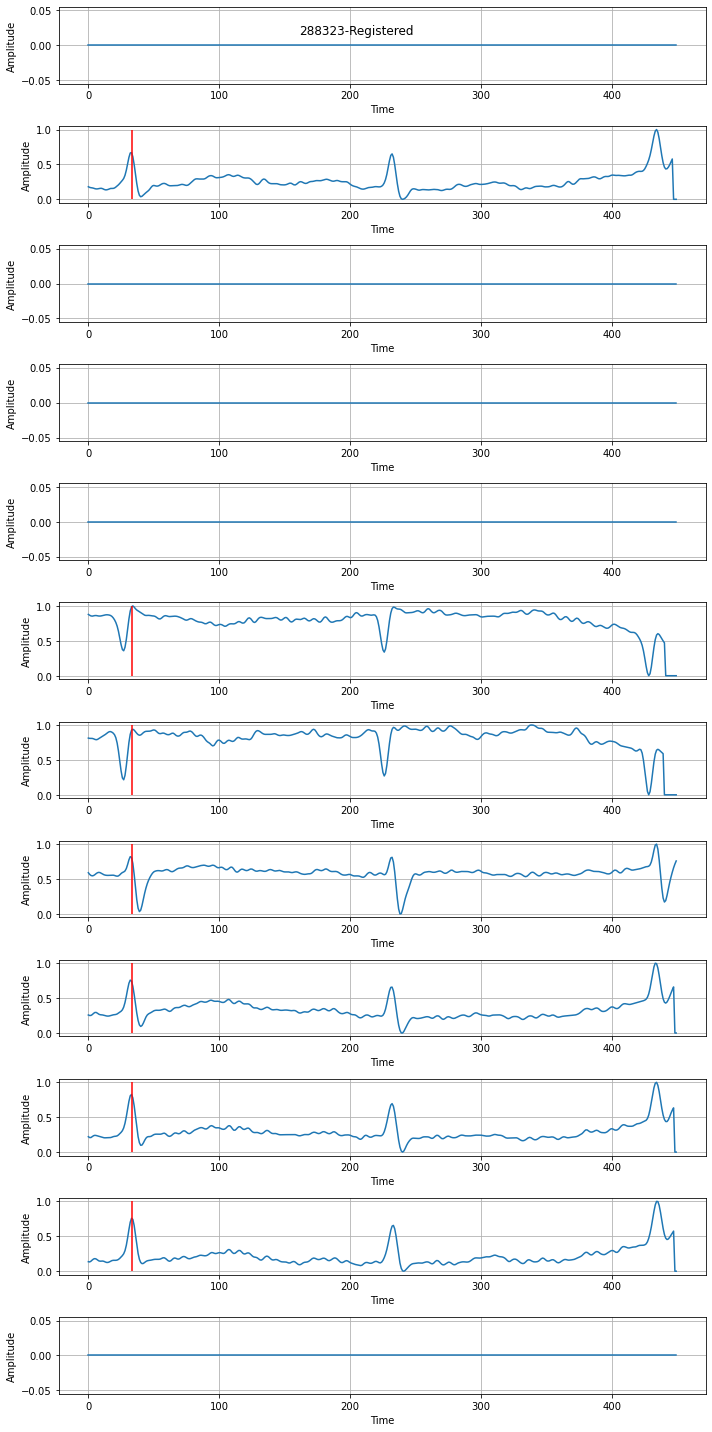

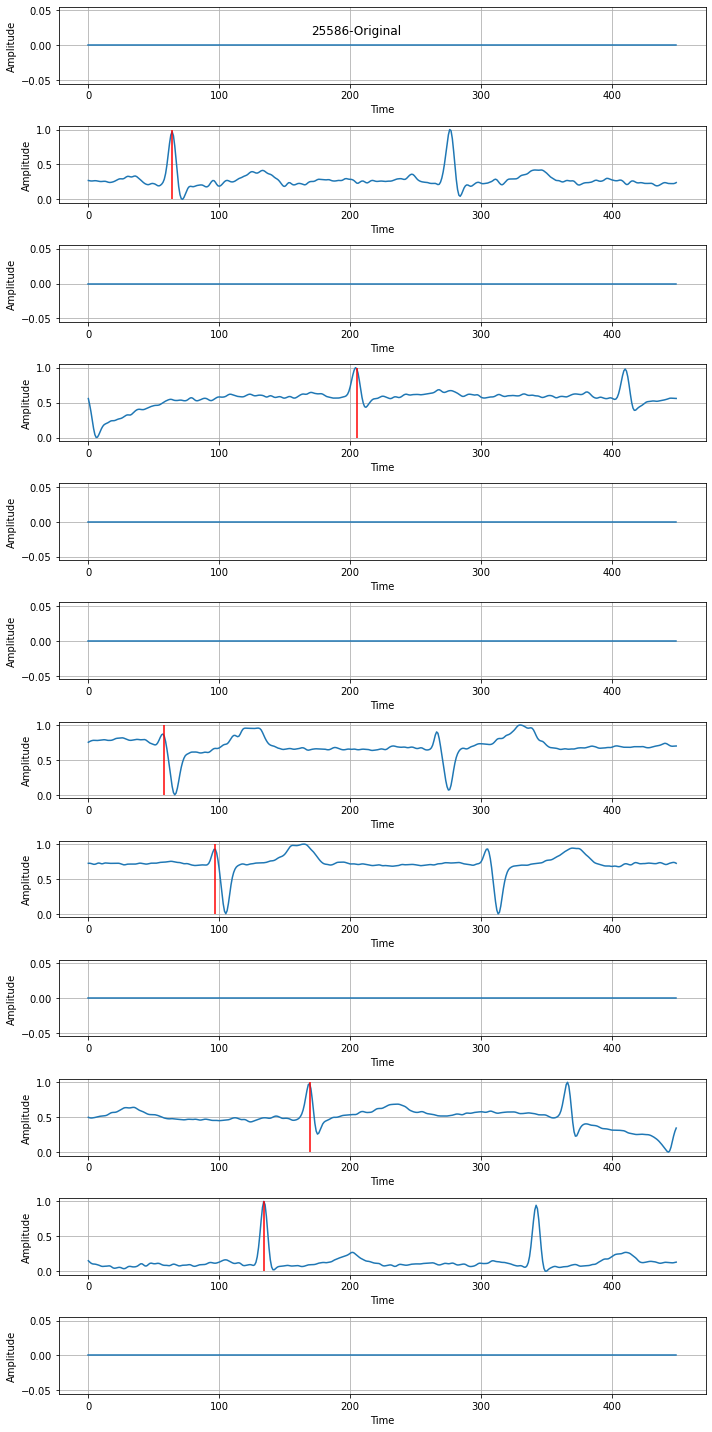

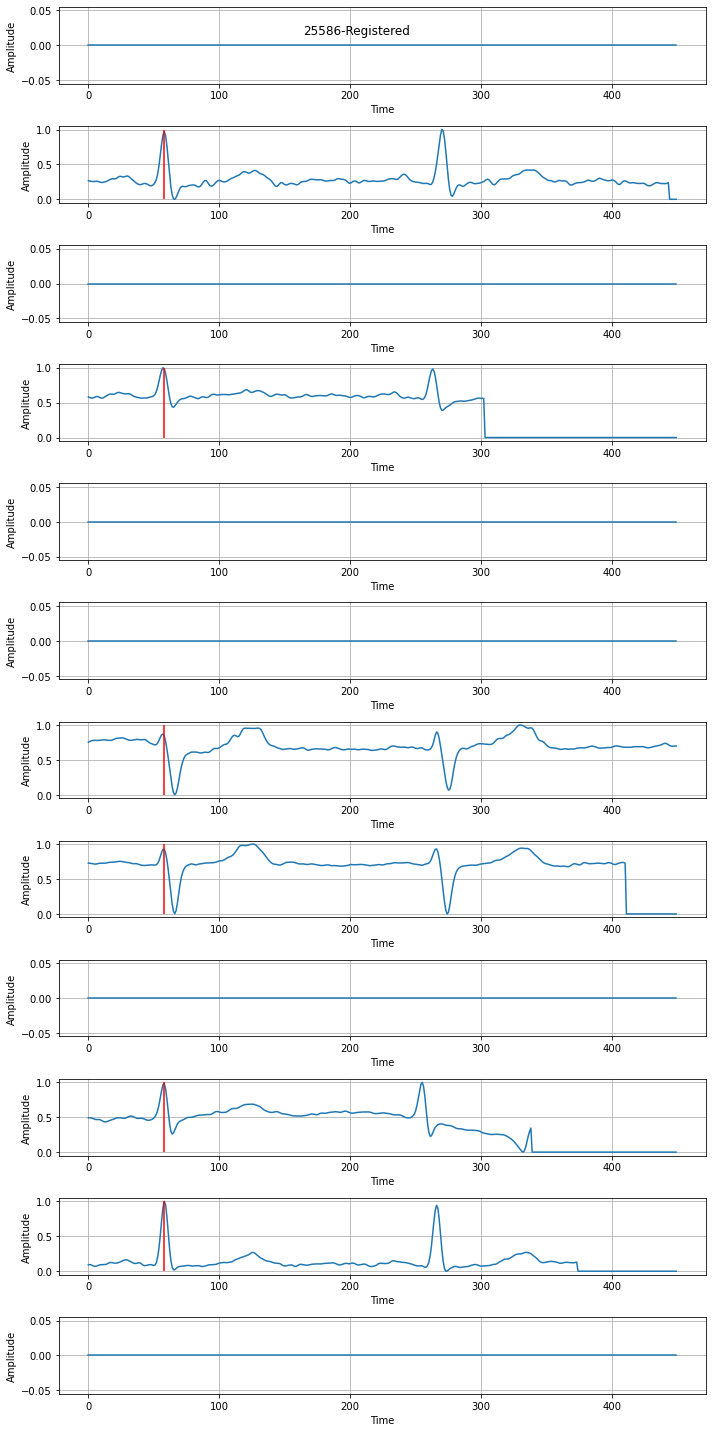

In [3]:
for _ in range(5):
    jj = np.random.randint(0, len(signals))
    signal = np.load(individual_signals_path+f'/{signals[jj]}.npy')
    signal_filled = np.nan_to_num(signal, nan = 0)

    registered_signal = register_all_peaks_to_minimal_peak(signal_filled)

    # plot_12_channels_vertically(signal_filled, f'{jj}-Original')
    # plot_12_channels_vertically(registered_signal, f'{jj}-Registered')

    


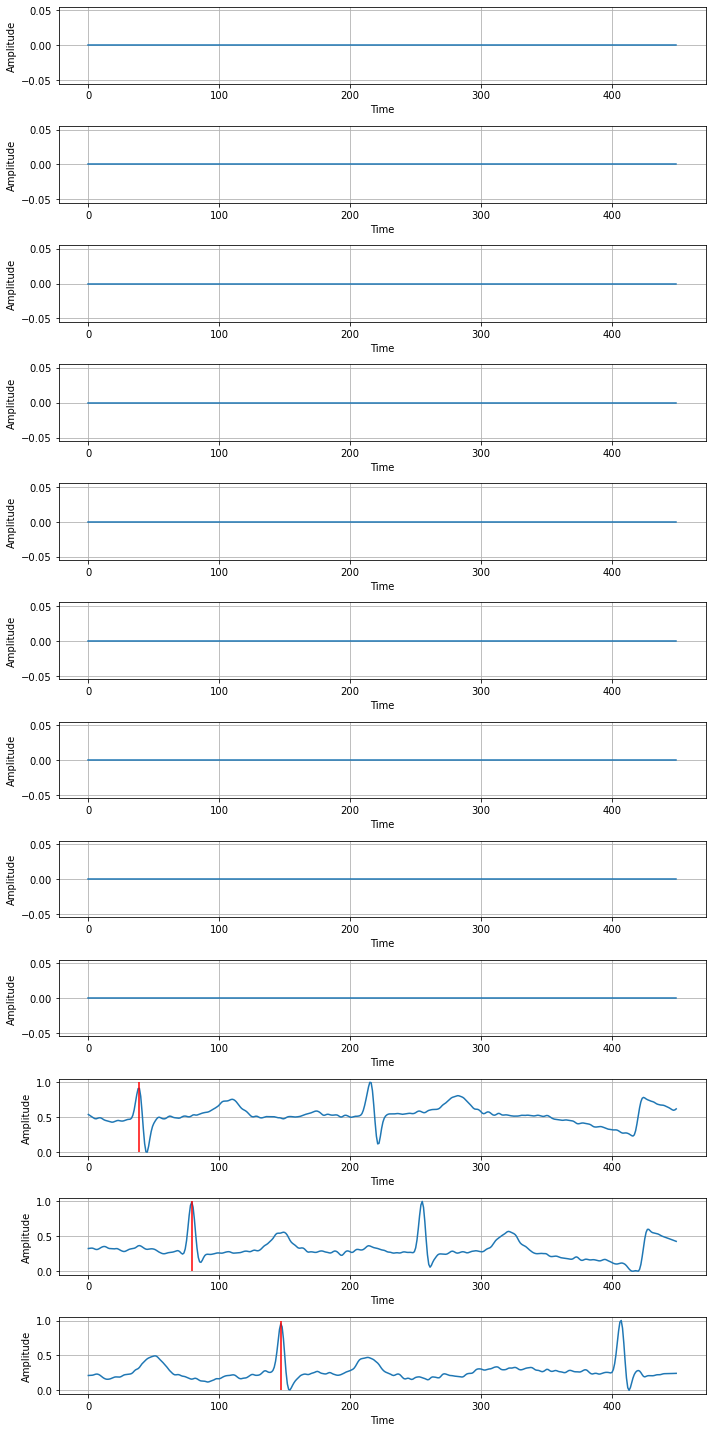

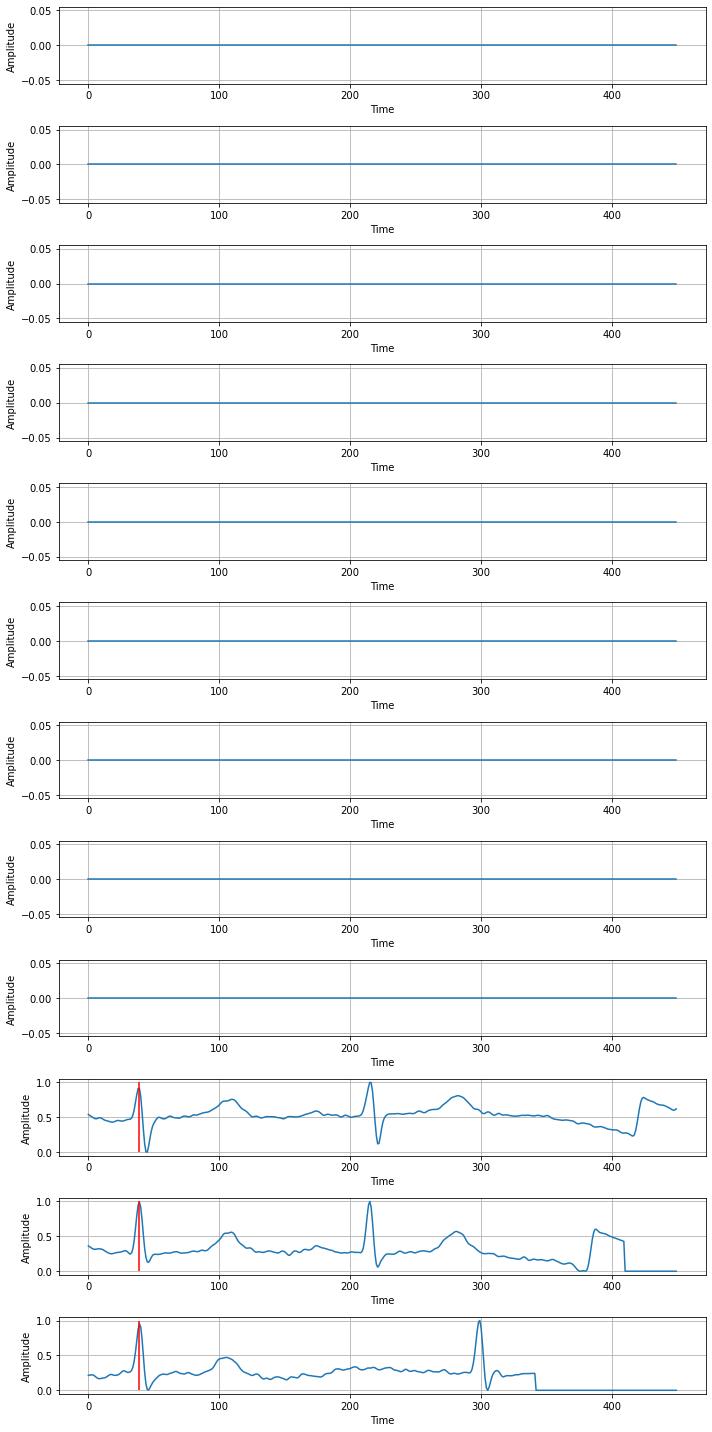

In [4]:
signal_ = np.load(individual_signals_path+f'/{signals[320558]}.npy')
signal_filled = np.nan_to_num(signal_, nan = 0)

registered_signal = register_all_peaks_to_minimal_peak(signal_filled)

plot_12_channels_vertically(signal_filled,)
plot_12_channels_vertically(registered_signal)

# Save Data
NOTE: Stopped, taken to a bash file

In [10]:
from tqdm import tqdm

for jj in tqdm(range(len(signals))):
    signal = np.load(individual_signals_path+f'/{signals[jj]}.npy')
    signal_filled = np.nan_to_num(signal, nan = 0)

    registered_signal = register_all_peaks_to_minimal_peak(signal_filled)

    # if want to test
    # ----
    # plot_12_channels_vertically(signal_filled, f'{jj}-Original')
    # plot_12_channels_vertically(registered_signal, f'{jj}-Registered')
    
    # signal = np.load(f'{individual_registered_signals_path}/{signals[jj]}.npy')
    # plot_12_channels_vertically(registered_signal, f'{jj}-Registered loaded')


    np.save(f'{individual_registered_signals_path}/{signals[jj]}.npy', registered_signal)

    


  0%|          | 12/408733 [00:22<232:57:18,  2.05s/it]

# Test registration
An update for May 13th - The registration process has complete. Now we make sure that it worked.

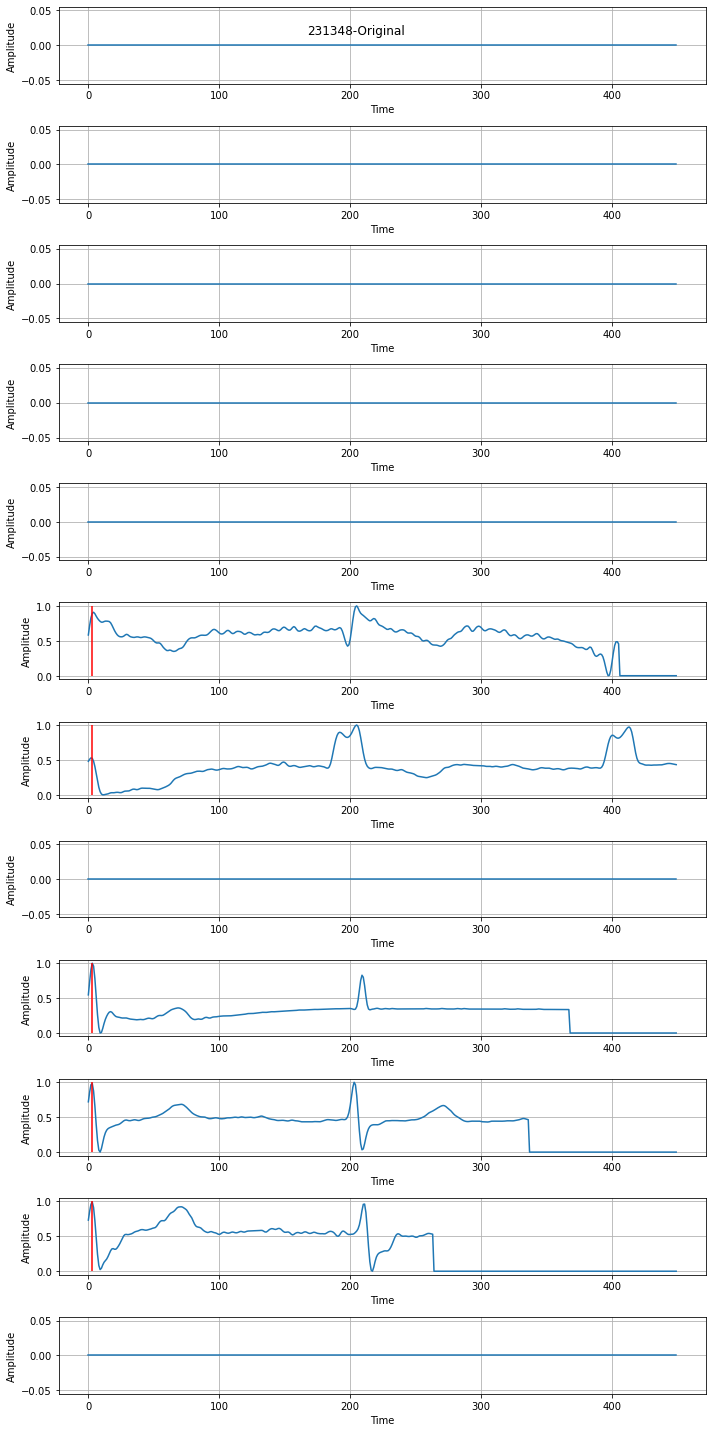

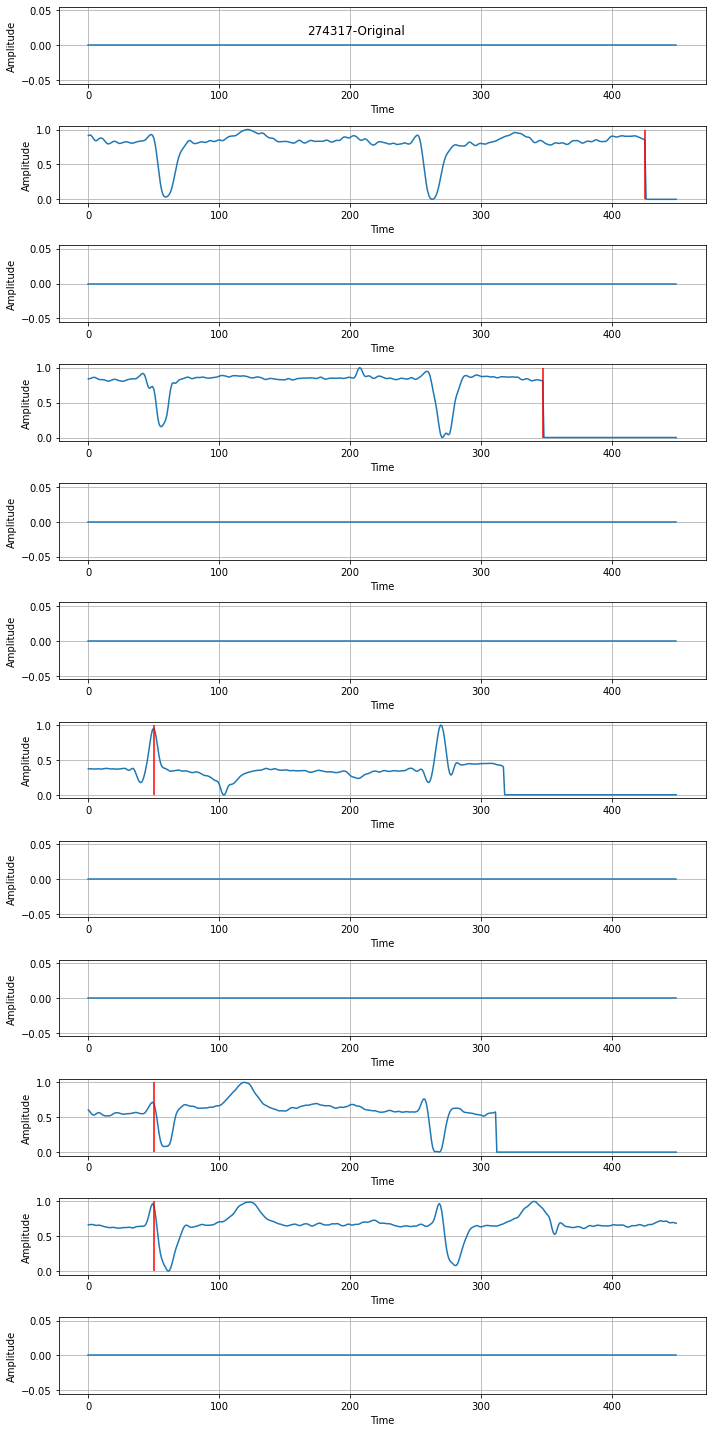

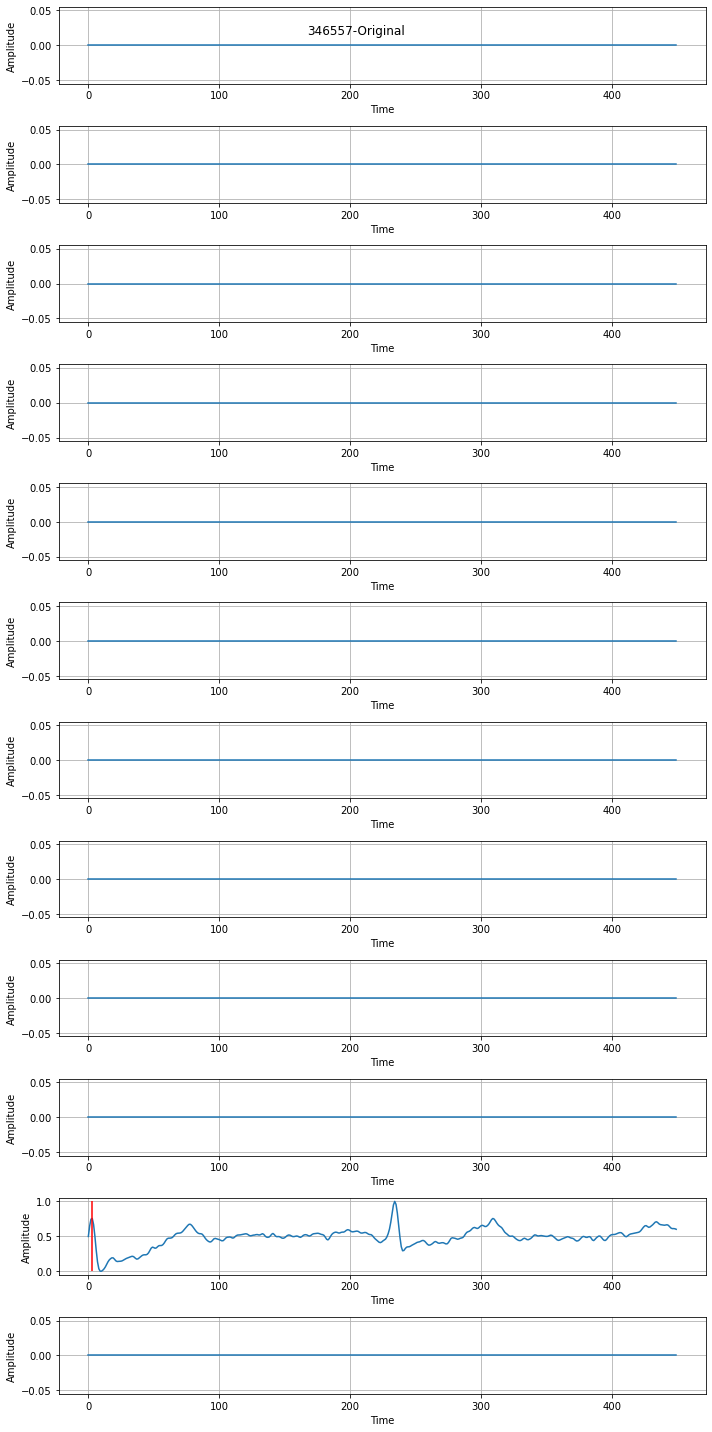

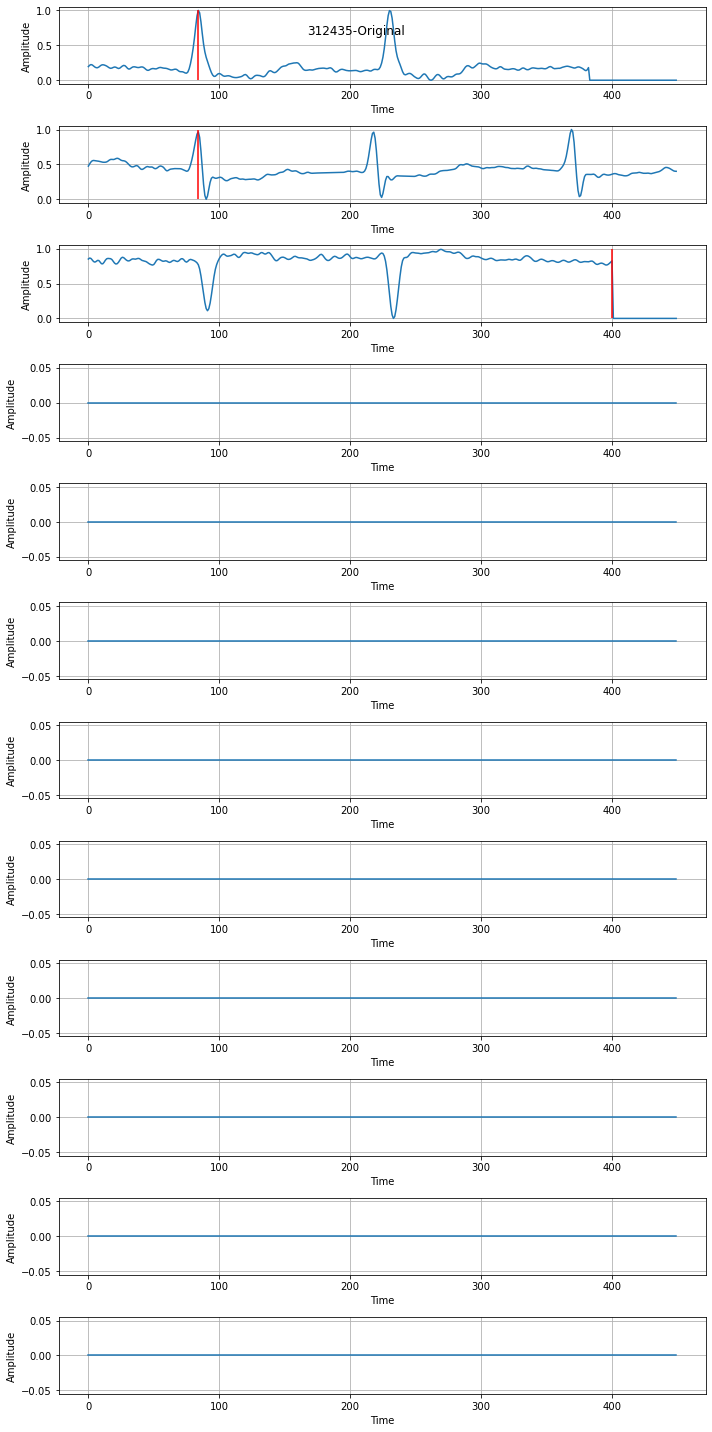

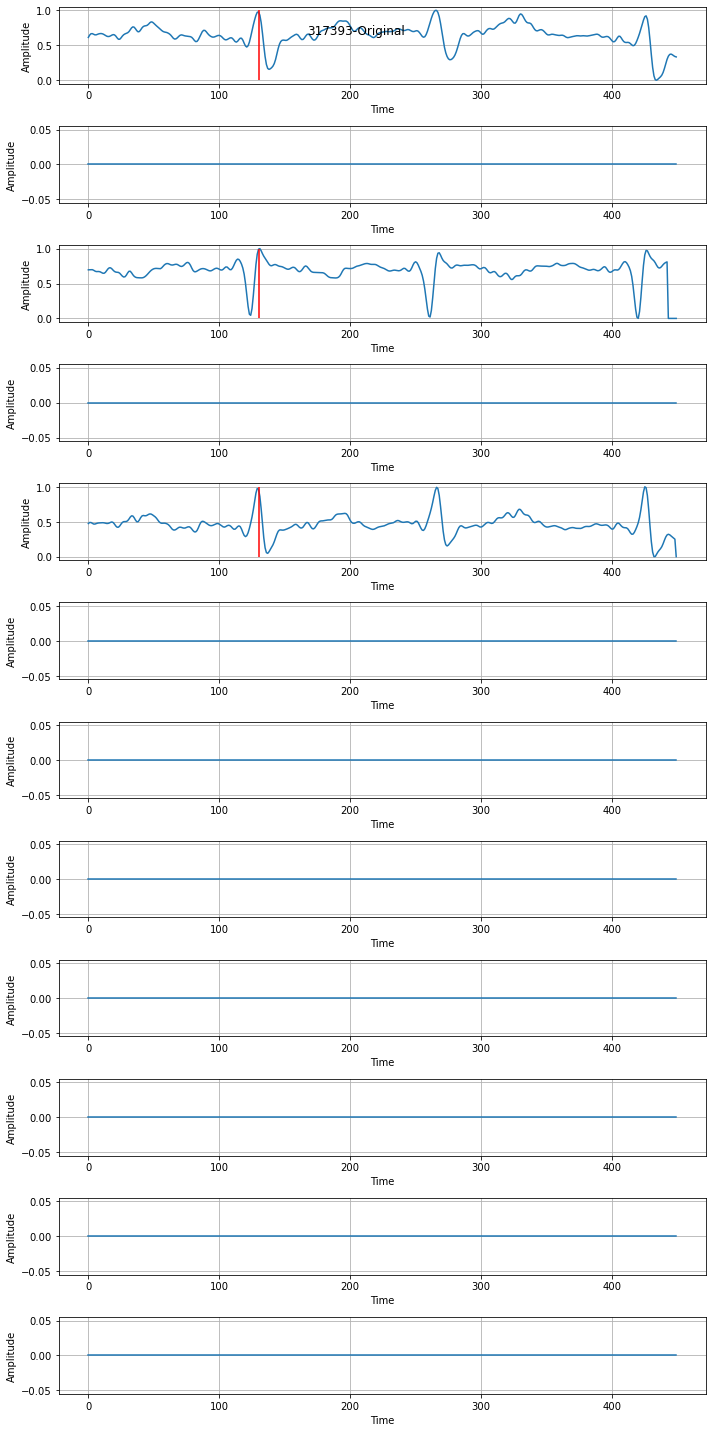

In [7]:
individual_signals_path = './downstream_classification/data/individual-signals-registered/'

for _ in range(30):
    jj = np.random.randint(0, len(signals))
    signal_filled = np.load(individual_signals_path+f'/{signals[jj]}.npy') # they should be filled already
    # signal_filled = np.nan_to_num(signal, nan = 0)

    plot_12_channels_vertically(signal_filled, f'{jj}-Original')
    # plot_12_channels_vertically(registered_signal, f'{jj}-Registered')

    print('-'*40)
    
